# Linear Regression II

Learning objectives:

Learn basic measures of quality of fit and variance explained:
- Mean Squared Errors
- R2
- Total Sum of Squares
- Residual Sum of Squares
- Explained Sum of Squares
- Linear Regression with multiple parameters


---

## Linear regression *recap*. 

In the last tutorial we went over linear regression using *numpy*'s *polyval* and *polyfit*.

Linear regression is used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable. 

The goal of linear regression is to find the best-fit model that minimizes the difference between the predicted values and the actual values. Linear regression is important because it can help us to understand and predict the relationship between two or more variables. The term **linear** in Linear regression does not refer only to a line, but it applies to any polynomial! Linear here is referred to the parameters of the model and not the model *per se*!


In the previous tutorial we have learned how to fit models via linear regression by using `numpy`. Here we will learn a little bit more about fitting linear regression models. 


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(123)
x = np.random.rand(50)
y = 2*x + 0.5*np.random.randn(50)

# Fit a linear regression model
coeffs = np.polyfit(x, y, 1)
y_pred = np.polyval(coeffs, x)

# Print the coefficients
print("Intercept:", coeffs[0])
print("Coefficient:", coeffs[1])

# Compute SSE
sse = sum((y-y_pred)**2)
print("SSE:", sse)

Intercept: 1.8342321813863356
Coefficient: 0.13583178849897345
SSE: 15.356374565056809


---

### <span style="color:blue">Exercise</span> 

- Generate your own data of shape `(10,)`.
- Fit a line and estimate the SSE
- Make a single figure and plot, data, and line in different colors

Intercept: 2.2565598329818948
Coefficient: 0.060003869979580945
SSE: 3.764467478200491


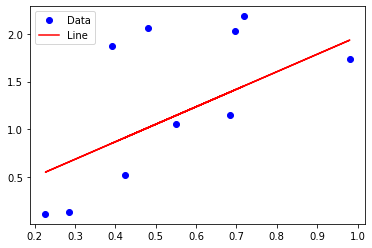

In [53]:

# Generate random data
np.random.seed(123)
x1 = np.random.rand(10)
y1 = 2*x1 + 0.5*np.random.randn(10)

# Fit a linear regression model
coeffs1 = np.polyfit(x1, y1, 1)
y_pred1 = np.polyval(coeffs, x1)

# Print the coefficients
print("Intercept:", coeffs1[0])
print("Coefficient:", coeffs1[1])

# Compute SSE
sse1 = sum((y1-y_pred1)**2)
print("SSE:", sse1)

# Plot 
fig, ax = plt.subplots()
ax.plot(x1, y1, 'o', color='blue', label='Data')
ax.plot(x1, y_pred1, '-', color='red', label='Line')
ax.legend()

plt.show()

---

## Linear regression using scikit-learn

The same operations of fitting and evaluating the fit of a regression model can also be implemented using a much more powerful set of toosl implemented in the machine learning library `scikit-learn`. `scikit-learn` has module dedicated to linear regression models called `LinearRegression`. 

Let's import it:

In [54]:
from sklearn.linear_model import LinearRegression

We can implement the operations shown about using `polyval` and `polyfit` using `LinearRegression` using the following lines:

In [55]:
# Fit a linear model
model = LinearRegression()

# The fit method in LinearRegression only acceps predictors (x) as matrices. 
# So we need to reshape our array:
X = np.array(x).reshape(-1, 1)
model.fit(X, y)
y_pred2 = model.predict(X)

# The coefficients can be extracted from the fit model as follows:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Compute SSE
sse2 = sum((y-y_pred2)**2)
print("SSE:", sse2)

Intercept: 0.1358317884989737
Coefficient: 1.8342321813863354
SSE: 15.35637456505681


OK, besides the ideosyncracy of how `LinearRegression` accepts `x`, that was not very different. Instead of  using `polyfit` and `polyval`, we used `model.fit` and `model.predict` and the results (parameers and MSE) were identical. Good.

Now, `LinearRegression` might seem a little bit more complicated because, oh well, it is more complicated but also much more powerful! 

---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(12,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Make a single figure and plot, data, and line in different colors

Intercept: [-0.04791009]
Coefficient: [2.64178496]
SSE: [2.95568014]


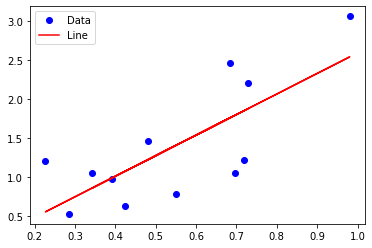

In [56]:
# Fit a linear model
model = LinearRegression()

#Generate data 
np.random.seed(123)
x3 = np.random.rand(12)
y3 = 2*x3 + 0.5*np.random.randn(12)

# Reshape the data to have shape (12, 1)
x3 = x3.reshape(-1, 1)
y3 = y3.reshape(-1, 1)

# Fit a linear regression model
model.fit(x3, y3)
y_pred3 = model.predict(x3)


# The coefficients can be extracted from the fit model as follows:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Compute SSE
sse4 = sum((y3-y_pred3)**2)
print("SSE:", sse4)

# Plot 
fig, ax = plt.subplots()
ax.plot(x3, y3, 'o', color='blue', label='Data')
ax.plot(x3, y_pred3, '-', color='red', label='Line')
ax.legend()

plt.show()

---

## Quality of fit metrics

Linear regession is more generally referred to as *Ordinary Linear Square Regression* or *OLS* Regression. 

This is because the approach in regression is to minimise the sum of square errors (SSEs) between the data and the prediction of a model. The parameters of the model are adjusted so as to reduce the SSE and eventually minimize it.

We have seen before how to compute the SSE.

In [57]:
print(sum((y-y_pred)**2))

15.356374565056809


In addition to SSE there are other measures of error important to learn about. 



When fitting OLS regression models we attempt to explain some proportion of the variability in the data with a model. More specifically, we try to explain some proportion fo the *variance* in the data using the model. So models are generally judged by the proportion of variance in the data that they can explain. 

The proportion of variance explained is a measure that describes the amount of variation in the dependent variable ($y$) that can be explained by the independent variable(s) ($x$) in a statistical model, such as a linear regression model.

When we fit a regression model, we are trying to find a line (or curve) that best represents the relationship between the independent variable(s) and the dependent variable. The amount of variation in the dependent variable that can be explained by the independent variable(s) is determined by the fit of the regression line to the data points.

In the context of linear regression, the total sum of squares ($TSS$) can be decomposed into two components: 
* the explained sum of squares ($ESS$) and 
* the residual sum of squares ($RSS$ or as called until now, the sum of squared error, $SSE$).

The explained sum of squares ($ESS$) is the sum of squares of the difference between the predicted values of the dependent variable and the mean of the dependent variable. It represents the amount of variability in the dependent variable that is explained by the independent variable(s) in the model.

$ESS = Σ(ŷi - ȳ)^2$

In [58]:
ESS = sum((y_pred - np.mean(y))**2)
print(ESS)

9.091390913253536


The residual sum of squares ($RSS$, a.k.a., $SSE$) is the sum of squares of the difference between the predicted values of the dependent variable and the actual values of the dependent variable. It represents the amount of variability in the dependent variable that is not explained by the independent variable(s) in the model.

$RSS = Σ(yi - ŷi)^2$

In [59]:
RSS = sum((y - y_pred)**2) #a.k.a. SSE
print(RSS)

15.356374565056809


The total sum of squares ($TSS$) is the sum of squares of the difference between the actual values of the dependent variable and the mean of the dependent variable. It represents the total amount of variability in the dependent variable.

$TSS = Σ(yi - ȳ)^2$

In [60]:
TSS = sum((y - np.mean(y))**2)
print(TSS)

24.447765478310348


where $y_i$ is the actual value of the dependent variable, $ŷ_i$ is the predicted value of the dependent variable, and $ȳ$ is the mean of the dependent variable.

Note that $TSS = Σ(RSS + ESS)$

In [61]:
print([TSS, RSS+ESS])

[24.447765478310348, 24.447765478310345]


So far we have used only the SSE to copute the quality of fit of a model. There are several alternatives to RSS (a.k.a., SSE) that can be used to estimate the quality of fit of a model. A few commonly used ones are:

* Mean squared error (MSE): MSE is calculated as SSE divided by the number of degrees of freedom in the model. It is a measure of the average squared difference between the predicted values of the dependent variable and the actual values, and is often used as a measure of the overall goodness of fit of a model.

* Root mean squared error (RMSE): RMSE is the square root of MSE and is often used as a more interpretable measure of the overall goodness of fit of a model. RMSE has the same units as the dependent variable and is more easily interpretable than MSE.

* Mean absolute error (MAE): MAE is a measure of the average absolute difference between the predicted values of the dependent variable and the actual values. It is less sensitive to outliers than SSE and can be more robust in the presence of extreme values.

* Coefficient of determination (R²): R² is a measure of the proportion of variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit between the model and the observed data. $R² = 1 - (SSE / TSS)$

Each one of these metrics is useful in different situations. Others also exist such as the K-L Divergence or Akaiake Information Criteria (AIK) or Baeysian Information Cirteria (BIC), we will cover some of these only in the future.


`scikit-learn` provides a convenient way to compute several goodness of fit  metrics to evaluate model performance. The module `sklearn.metrics` can be imported and submodules within it contain estimators of the goodness of fit of models: 

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
 
mae  = mean_absolute_error(y_true=y,y_pred=y_pred)
mse  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
rmse = mean_squared_error(y_true=y,y_pred=y_pred,squared=False)
r2   = r2_score(y_true=y,y_pred=y_pred)
 
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root-Mean Squared Error (RMSE):",rmse)
print("Coefficient of Determination (R²):",r2)

Mean Absolute Error (MAE): 0.4859694020486803
Mean Squared Error (MSE): 0.3071274913011361
Root-Mean Squared Error (RMSE): 0.5541908437543299
Coefficient of Determination (R²): 0.37187001492301097


---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(15,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Use `scikit-learn.metrics` to estimate 

In [63]:
# Fit a linear model
model = LinearRegression()

#Generate data 
np.random.seed(123)
x4 = np.random.rand(15)
y4 = 2*x4 + 0.5*np.random.randn(15)

# Reshape the data to have shape (12, 1)
x4 = x4.reshape(-1, 1)
y4 = y4.reshape(-1, 1)

# Fit a linear regression model
model.fit(x4, y4)
y_pred4 = model.predict(x4)


# The coefficients can be extracted from the fit model as follows:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Compute SSE
sse5 = sum((y4-y_pred4)**2)
print("SSE:", sse5)


mae1  = mean_absolute_error(y_true=y4 ,y_pred=y_pred4)
mse1  = mean_squared_error(y_true=y4 ,y_pred=y_pred4) #squared=True
rmse1 = mean_squared_error(y_true=y4 ,y_pred=y_pred4 ,squared=False)
r21   = r2_score(y_true=y4 ,y_pred=y_pred4)
 
print("Mean Absolute Error (MAE):",mae1)
print("Mean Squared Error (MSE):",mse1)
print("Root-Mean Squared Error (RMSE):",rmse1)
print("Coefficient of Determination (R²):",r21)

Intercept: [-0.23579614]
Coefficient: [2.46400258]
SSE: [3.98399448]
Mean Absolute Error (MAE): 0.44979327497532007
Mean Squared Error (MSE): 0.2655996317699485
Root-Mean Squared Error (RMSE): 0.5153635918164461
Coefficient of Determination (R²): 0.542313414754195


### Linear regression using scikit-learn (generalized linear regression)


So, far we have used `scikit-learn`'s `LinearRegression` uniquely to predict `n` `y` variables from `n` `x` variables.

Yet, in practice we can think situations where we might have multiple variables (say `n x m` variables) and we would like to use them to predict a single set of `n` variables.

For example imagine the case of `m` repeated measures of `n` values and wanting to predict corresponding `n` values of another variable.

`LinearRegression` allows us to set up this type of modelling. This is the reason why the `X` variables must alswyas be 2D and above we had to make sure it was a 2D array.

To work this example, we will use one of the datasets that come with `scikit learn`, the Boston Housing database:

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

To explore the dataset take a look at the Headers and Dictionary Keys. For example:

In [65]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([boston_df.values[::2, :], boston_df.values[1::2, :2]])
y = boston_df.values[1::2, 2]



In [66]:
# Load the Boston dataset
boston_dataset = load_boston()

# Print the feature names
print(boston_dataset.feature_names)

# Print the dictionary keys
print(boston_dataset.keys())

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/Users/shannoningram/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

Where:

* `data`: contains the information for various houses
* `target`: prices of the house
* `feature_names`: names of the features
* `DESCR`: describes the dataset

The dataset contains a series of attributes or features (variables) measured along different dimensions. 

Take a look at:

In [67]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The last variable `MEDV` (or median value) is our interest. It is the median value of homes in thousands of dollars.

The dataset contains `.data` and `.target`

In [68]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [69]:
print(boston_dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

For convenience we are going to create a smalled table of features:

In [70]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can take a look at the median house value:

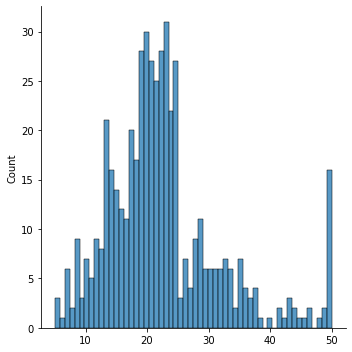

In [71]:
sns.displot(boston_dataset.target, bins=56)

We can explore the relationship between some of the features in the data and the target variable:

Text(0, 0.5, 'Median House Values (MEDV)')

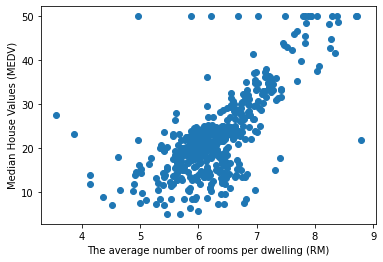

In [73]:
x = boston['RM']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('The average number of rooms per dwelling (RM)')
plt.ylabel('Median House Values (MEDV)')

OK, it looks like there are features (like "RM") that have a relationship with the Median House Values. Let's try another feature:

Text(0, 0.5, 'Median House Values (MEDV)')

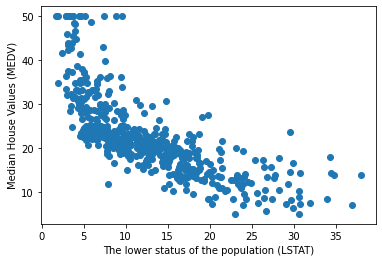

In [74]:
x = boston['LSTAT']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('The lower status of the population (LSTAT)')
plt.ylabel('Median House Values (MEDV)')

Also, a relationship. So, it looks like multiple features in the dataset have a relationship with the target variable (the median house value)

---

### <span style="color:blue">Exercise</span> 

- Explore the relationship between the target variable and two additional features of your choice. Make a plot.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Text(0, 0.5, 'Median House Values (MEDV)')

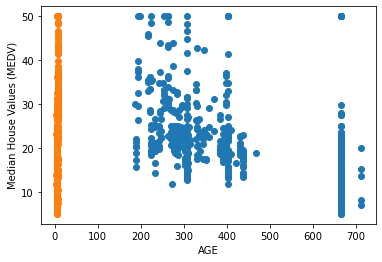

In [75]:
print(boston_dataset.feature_names)
x = boston['TAX']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('TAX')
plt.ylabel('Median House Values (MEDV)')

x = boston['RM']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('AGE')
plt.ylabel('Median House Values (MEDV)')

---

It looks like multiple features have some relationship with the median house value in Boston. 

So, it makes sense to think that a linear combination of all these variables should predict in some way the median house value. This is a case in which `m` variables (features) predict alltogether a target variable.

We will use `LinearRegression` to experiment with fitting a linear model where `m` features predict a single variable.

First let's organize the data:

In [ ]:
# get dependent and independent variables from the data set
X = boston_dataset.data
y = boston_dataset.target

Second, let's fit the linear regression model. 

In [ ]:
housing_linear_regression = LinearRegression()
housing_linear_regression.fit(X, y)

Third, we will use the model to predict the data, the median house value:

In [ ]:
y_pred = housing_linear_regression.predict(X)

Finally, we will compare using a plot the predicted and measured Median House Value

In [ ]:
y_data_array = np.array(y).reshape(-1, 1) 
y_pred_array = np.array(y_pred).reshape(-1, 1)

In [ ]:
x = y_data_array
y = y_pred_array
plt.scatter(x, y, marker='o')
plt.xlabel('Predicted: Median House Values (MEDV)')
plt.ylabel('Measured: Median House Values (MEDV)')

---

### <span style="color:blue">Exercise</span> 

- Explain in your own words what you see in the previos Figure.
- Describe what the above experiment did
- How many features where in our model?
- How good was the quality of the fit (what was the R2 and MSE)?

In [ ]:
print(len(boston_dataset.feature_names))


In [ ]:
# Compute SSE
sse6 = sum((y-y_pred)**2)
print("SSE:", sse5)


mae2  = mean_absolute_error(y_true=y ,y_pred=y_pred)
mse2  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
rmse2 = mean_squared_error(y_true=y ,y_pred=y_pred ,squared=False)
r22   = r2_score(y_true=y ,y_pred=y_pred)
 
print("Mean Absolute Error (MAE):",mae2)
print("Mean Squared Error (MSE):",mse2)
print("Root-Mean Squared Error (RMSE):",rmse2)
print("Coefficient of Determination (R²):",r22)



Judging by the low SSE, I would say this was a good fit
